# 截断误差、舍入误差与科学计算中的陷阱

庞龙刚 @ 华中师范大学

## 学习目标

- 认识截断误差（Truncation Error）、舍入误差（Rounding Error）

- 认识使用计算机做数值计算可能遇到的**陷阱**

- 主动规避，快速定位，解决遇到的**陷阱**

## 学习任务

- 截断误差
- 熟悉 float32，float64（double），舍入误差
- 知道一个数据类型能表示的最大，最小数，防止溢出
- 避免大数加小数，或对大量浮点数的连加操作
- 避免两个相近的数相减
- 避免对浮点数使用“相等”比较
- 熟悉 NaN （Not A Number), inf
- 预估任务复杂度、内存和硬盘占用

## 截断误差：从口算开根号说起

有一个神奇的公式，根据它可以口算常见正整数的根号。这个公式就是，

\begin{align}
\sqrt{n+\Delta n} \approx \sqrt{n} + \frac{\Delta n}{2 \sqrt{n}}
\end{align}

比如，对于 $\sqrt{26}$, 上面式子中 $n=25$, $\Delta n=1$, 口算得到 $\sqrt{26} \approx 5 + \frac{1}{2\times 5} = 5.1$ 。使用计算器得到的  $\sqrt{26}=5.099019...$, 上面的口算结果非常接近正确值。

上面的式子对于 $n=1, 4, 9, 16, 25, 36, ..., 81$ 等等都很好计算，

- $\sqrt{10} = 3.16227 \approx 3 + \frac{10 - 9}{2\times 3} = 3.1667$, 
- $\sqrt{82} \approx 9 + \frac{1}{2 \times 9} = 9\frac{1}{18}$ 

这个公式来自哪里呢？它来自于泰勒展开公式。
$$
f(x+ \Delta x) = f(x) + f'(x)\Delta x + \frac{1}{2!}f''(x)\Delta x^2 + \cdots
$$
将 $\sqrt{x+\Delta x}$ 泰勒展开，
$$
\sqrt{x+ \Delta x} = \sqrt{x} + \frac{\Delta x}{2\sqrt{x}} - \frac{1}{8} \frac{\Delta x^2}{(\sqrt{x})^3} + \cdots
$$
可以看到，口算开根号公式是泰勒展开的前两项。

这个公式的后面所有高阶项都被省略，称为**截断误差**  $O(- \frac{1}{8} \frac{\Delta x^2}{(\sqrt{x})^3} + \cdots)$。

可以尝试口算 $\sqrt{99} = 9 + \frac{18}{2\times 9} = 10$, 计算器算出来的值为 9.94987。因为 $\Delta x$ 与 $\sqrt{x}$ 的比值较大，此时截断误差的首项为

  $- \frac{1}{8} \frac{\Delta x^2}{(\sqrt{x})^3} = - \frac{1}{8} \frac{18^2}{(9)^3} = - \frac{1}{18} \approx -0.05$

知道了泰勒展开公式，就可以将上面的口算开根号公式推广，
$$
\sqrt{n-\Delta n} \approx \sqrt{n} - \frac{\Delta n}{2 \sqrt{n}}
$$
从离 99 更近的 100 开始计算，则  $\sqrt{99} =\sqrt{100-1} \approx 10 - \frac{1}{2\times 10} = 9.95$， 更加接近真实值 9.94987。

习题 1：使用泰勒展开公式笔算 $\cos(31^{\circ})$，并估计截断误差。

习题 2：使用泰勒展开公式说明，为何谐振子势 $V(x) = \frac{1}{2} x^2$ 在物理中应用如此广泛。（提示：束缚态势函数 V(x) 在极小值附近展开）

## 浮点数与舍入误差

理论上实数可以有无穷多位，比如圆周率 $\pi$,

3.14159 26535 89793 23846 26433 83279 50288 41971 69399 37510 58209 74944 59230 78164 06286 20899 86280 34825 34211 70679 .....

计算机只能用有限个 bit 表示实数, 引入了舍入误差,

根据 IEEE754 标准，使用 32 和 64 个二进制的 bit 表示的浮点数分别被称为单精度和双精度浮点数，它们是科学计算中最常用的数据类型，

- float32 (single precision），有效数字约为 7 位， $\pi = 3.1415927$
- float64 (double precision），有效数字约为 16 位, $\pi= 3.141592653589793$



In [8]:
import numpy as np

print("float32(pi)=", np.float32(np.pi))
print("float64(pi)=", np.float64(np.pi))

float32(pi)= 3.1415927
float64(pi)= 3.141592653589793


单精度浮点数 （float32)，使用
- 1 个 bit 表示正负号，记为 s
- 23 个 bit 表示有效数字，记为 $a_0 a_1 \cdots a_{23}$
- 8 个 bit 表示指数位，记为 $b_0 b_1 \cdots b_7$

每个 bit 只有 0 或 1 两个取值。整个浮点数记为，

\begin{align}
x = (-1)^s \times a \times 2^{b - E}
\end{align}

其中 E 表示最大指数位的一半，E(float32) = 127 = $2^7 = 1111111_2$。

In [4]:
# 科学计数法

x = 1.0E-10   # 表示 1乘10的-10次方，对应内部二进制表示 ( s=0, a=0000...001, b-E<0)

y = -1.0E8    # 对应内部二进制表示 ( s=1, a=0000...001, b-E>0)

### 最大的浮点数与数值溢出

如果 x 是最大的浮点数，则 2x 会出现数值溢出

In [12]:
# python 默认的 float 为 float64（double）类型，

import sys

sys.float_info               

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [8]:
x = sys.float_info.max
print("x=", x)
print("(2*x)/5=", (2 * x) / 5)
print("0.4*x=", 0.4*x)

x= 1.7976931348623157e+308
(2*x)/5= inf
0.4*x= 7.190772539449263e+307


In [19]:
# numpy 的 float32 类型可以表示的最大数

x = np.finfo(np.float32).max

print('x=', x)
print('2 x=', np.float32(2 * x))

x= 3.4028235e+38
2 x= inf


In [23]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)


- float32: 4 个字节 （Bytes），每个字节8个比特（bit），总共 32 个比特，每个比特取值 0 或 1

- float32 负数表示范围：-3.4028235E+38 到 -1.401298E-45

- float32 正数表示范围：1.401298E-45 到 3.4028235E+38

- 因为小数点后有效数字只有6位，float32 没有能力完整表示 100 + 10E-6

## 大数加小数遇到的困难

float32 精度下，下面这两个数相加，结果是多少？

A = 3.1415927

B = 0.00000005 

如果 B 的值小于 A 的舍入误差，则 A+B 的计算与B无关。

In [13]:
# 小数被吃掉
np.float32(np.pi) + np.float32(5E-8)

3.1415927

In [92]:
A = np.float32(1.0E2)

B = np.float32(1.0E-6)

A + B

100.0

举例：夸克胶子等离子体冷却超曲面上发射出的强子数计算使用 Cooper-Frye 公式，

\begin{align}
\int p_{\mu} d\Sigma^{\mu} f(p, T) = \sum_i p_{\mu} d\Sigma^{\mu}_i f(p, T)
\end{align}

其中 $f(p\cdot u, T) = (2s+1)/(e^{p\cdot u / T} \pm 1)$  是费米子(+)或玻色子(-)满足的分布函数。

计算中将整个球面分割成几百万个小多边形，计算流过这些多边形的粒子数, 最后对几百万个小片求和。

在将代码从 CPU （float64）到 GPU （float32） 上移植时，发现累积误差可以大到 $5\%$!

In [16]:
# 大数加小数困难示例：小数连加

from tqdm import tqdm

loops = int(1E7)
res = np.float32(0.0)
dx = np.float32(1.0E-7)

for i in tqdm(range(loops)):
    res += dx

# 真实结果
ground_truth = loops*dx

print("theoretical results: %s"%(ground_truth))
print("accumulated sum：", res)
print("relative error = ", (res-ground_truth)/ground_truth)

100%|█████████████████████████████████████████████████████████████████| 10000000/10000000 [00:02<00:00, 3935904.03it/s]

theoretical results: 1.0000000116860974
accumulated sum： 1.0647675
relative error =  0.06476746745356905


在 c/c++ 语言中, float32 记为 float，float64 记为 double。

python 中默认 float 为 float64

numpy：np.float32 或 np.float64

一般的科学计算尽量使用 float64 （double）数据类型，会省去很多麻烦（跃过大数吃小数、相近数相减的陷阱）。

GPU （图形处理单元，简称显卡） 并行编程时，为了加快运算，一般使用 float32 而不是 double（或称 float64) 类型。

目前的人工智能（深度学习）库，有时甚至使用 float16 数据类型。

## 大数加小数困难的解决方案

为了计算速度考虑，如果不想用 double（即 float64）数据类型，又希望大量数字的求和结果比较精确，
可以考虑使用如下两种方案：

1. Kahan 求和公式（解决串行求和时大数吃小数的问题）
2. 将串行求和转化为并行求和

### Kahan 求和原理

<img src="images/kahan_sum.gif" />

In [37]:
def kahan_sum(arr):
    '''连加操作中解决大数吃小数的问题
    :arr: numpy array，存储 float 类型
    :return: arr 中所有元素的和'''
    sum_ = np.float32(0)
    correction = np.float32(0)
    for addend in tqdm(arr):
        addend += correction                  #  <--  
        temp_sum = sum_ + addend              #     \
        addend_high = temp_sum - sum_         #     \
        correction = addend - addend_high     #   --
        sum_ = temp_sum                       # update
        
    return sum_

In [40]:
#举例

arr = np.ones(int(1.0E6), dtype=np.float32) * 1.0E-6

sum_ = np.float32(0)
for x in tqdm(arr):
    sum_ += x 
    
print("sum(arr)=", res)

100%|███████████████████████████████████████████████████████████████████| 1000000/1000000 [00:00<00:00, 2881855.25it/s]

sum(arr)= 1.0090389


In [39]:
kahan_sum(arr)

100%|███████████████████████████████████████████████████████████████████| 1000000/1000000 [00:00<00:00, 1620672.00it/s]


1.0

## 避免两个相近的数相减

有时候可能会遇到两个相近数的相减，比如计算数值微分时，使用如下公式

\begin{align}
 {d f \over dx} = {\rm lim}_{h \rightarrow 0} {f(x + h) - f(x) \over h}
\end{align}

从微分的定义来看， $h$ 越小，$df/dx$ 的计算越精确。

但 $h$ 越小，$f(x+h)$ 与 $f(x)$ 越接近，会出现相近数的相减问题。

举例：$f(x) = \sqrt{x}$, 此时 f(x) 对 x 的导数为，
\begin{align}
{df \over dx} = {1 \over 2} x^{-1/2}
\end{align}

在 x = 1 处，${df \over dx} = 0.5$.

In [53]:
def f(x):
    #return np.sqrt(x)
    return np.sqrt(x).astype(np.float32)

def dfdx(func, x=1, h=1.0E-6):
    return (func(x+h) - func(x))/h

print("h=0.01, dfdx=", dfdx(f, h=0.01))
print("h=0.001, dfdx=", dfdx(f, h=0.001))
print("h=1.0E-6, dfdx=", dfdx(f, h=1.0E-6))
print("h=1.0E-9, dfdx=", dfdx(f, h=1.0E-9))

h=0.01, dfdx= 0.49875974655151367
h=0.001, dfdx= 0.4998445510864258
h=1.0E-6, dfdx= 0.476837158203125
h=1.0E-9, dfdx= 0.0


几个避免相近数相减的替换方案(数值分析，李红）：

\begin{align}
\sqrt{x+\epsilon} - \sqrt{x} &= {\epsilon \over \sqrt{x + \epsilon} + \sqrt{x}} \\
\ln (x+\epsilon) - \ln(x) &= \ln(1 + {\epsilon \over x}) \\
{\rm for\ |x|\ll 1},\ e^x -1 &= x \left( 1 + {x \over 2} + {x^2 \over 6} + \cdots \right) \\
{\rm for\ |x|\ll 1},\ 1 - \cos x &= 2 \sin^2 {x \over 2}
\end{align}


## 避免两个浮点数的相等（==）比较

因为计算机上浮点数有舍入误差，对浮点数做 == 比较有时会出现不可预测的错误。

举例：

a = 3.14159268

b = 3.14159269

判断 a==b 返回 True 还是 False?

对于 float32 类型，最后的 8 和 9在舍入误差上，我们希望它返回 True

In [20]:
# 默认使用 float64 类型
a = 3.14159268

b = 3.14159269

a == b

False

In [23]:
# 比较好的做法是 np.isclose() 或 np.allclose() 函数
# 尤其是在对比数值解与解析解时
np.isclose(a, b)

# 使用 np.isclose(SHIFT + TAB), 在函数括弧处按 SHIFT+TAB 键看函数介绍
# 或 help(np.isclose)

True

### NaN （Not A Number) 和 inf ($\infty$)

自己辛苦编写了一长串程序，结果却输出 **nan**，怎么办？注意下面这些情形，

- $1 \over x$, x=0
- $\sqrt{x}$, x<0
- $\log(x)$, x<0
- $\exp(x)$, x 非常大


In [2]:
import numpy as np

x = np.sin(3/2 * np.pi)

# 根号下出现了负值
y = np.sqrt(x)

np.sin(y)

C:\Users\lgpan\anaconda3\envs\manim\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


nan

In [3]:
print("x =", x)
# 负数开 4 次方，或其他偶数次方
x**(1/4)

x = -1.0


C:\Users\lgpan\anaconda3\envs\manim\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [4]:
x = np.sin(0)

100 / x

C:\Users\lgpan\anaconda3\envs\manim\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


inf

In [7]:
# 根据粒子出射动量 (px, py)，计算方位角
def phi(px, py, wrong_method=False):
    '''计算出射角度
    :px: 动量的 x 分量
    :py: 动量的 y 分量
    :return: 方位角 [-pi, pi)'''
    return np.arctan2(py, px)
    
    # 注意：不能使用 np.arctan(py/px) 函数
    # 因为，如果粒子沿 y 轴出射, px==0, 
    # py/px 会出现“除零错误”

In [12]:
print("phi(px=0, py=1)=", phi(0, 1))
print("phi(px=-1, py=0)=", phi(-1, 0))
print("phi(px=0, py=-1)=", phi(0, -1))

phi(px=0, py=1)= 1.5707963267948966
phi(px=-1, py=0)= 3.141592653589793
phi(px=0, py=-1)= -1.5707963267948966


In [15]:
def phi_wrong(px, py):
    '''这是错误的计算粒子出射方位角方法'''
    return np.arctan(py/px)

phi_wrong(px=0, py=1)

ZeroDivisionError: division by zero

In [5]:
# 处理办法: 
# （1）加 assert 在 x < 0 时直接报错，不继续进行计算
# （2）或者使用 异常 捕获机制
x = -1 
assert(x > 0)
np.sqrt(x)

AssertionError: 

## 预估任务复杂度，内存与硬盘占用

有时候写了一个程序，结果运行起来永不停歇，或者爆出内存不够、显存不够或磁盘空间不够。

为了预防这些问题，要对任务复杂度、内存和硬盘占用进行预估。

举例：N 个带电粒子的分子动力学模拟，每一步需要计算每一对粒子之间的库伦相互作用，有 $\sim{\mathcal O}(N^2)$ 次操作.

对于 1 GHZ 的电脑CPU，每秒浮点数操作次数为 $10^9$，假设遍历一次需要 $10^{-9}$ 秒，可以估算每一步花费时间，

$N^2 \times 10^{-9}$ s

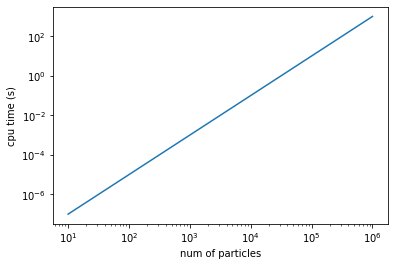

In [60]:
import matplotlib.pyplot as plt

def plot_time(dt = 1.0E-9):
    N = np.logspace(1, 6)
    t = N**2 * dt
    plt.loglog(N, t)
    plt.xlabel("num of particles")
    plt.ylabel("cpu time (s)")

plot_time()

## 内存、显存与硬盘占用

举例：假设电脑的可用内存为 1 GB，做三维相对论流体力学计算需要将空间离散化为 

${\rm Nx \times Ny \times Nz} = 1000 \times 1000 \times 1000$ grids

问：如果使用 float32 类型数据，内存是否够用？

1G = $10^9$， 1 M(兆) = $10^6$

1 Byte(字节） = $8$ bits（位）

1 float32 = 4 Byte

1 float64(double) = 8 Byte

假设每个格子上只保存一个浮点数，

${\rm Nx \times Ny \times Nz} = 10^{9}$ 个格子上的 float32 类型浮点数占用内存为 4 GB,
显然内存不够用。

如果设 ${\rm Nx=300, Ny=300, Nz=300}$, 

则内存占用为 108 兆比特，明显够用。

$\rm 27\ M\ float32 \times 4\ B/float32 = 108\ MB$
